<a href="https://colab.research.google.com/github/wp225/housing-data-exploration/blob/main/perceptron_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
class perceptron(object):
  def __init__(self,eta=.01,n_iter=50,random_state=1):
    self.eta=eta
    self.n_iter=n_iter
    self.random_state=random_state
  
  def fit(self,X,Y):
    rgen=np.random.RandomState(self.random_state)
    self.wt=rgen.normal(loc=0,scale=0.01,size=1+X.shape[1])
    self.error=[]
    for _ in range(self.n_iter):
      errors=0
      for xi,target in zip(X,Y):
        update=self.eta*(target-self.predict(xi))
        self.wt[1:]+=update*xi #normal weights 
        self.wt[0]+=update #bias
        errors += int(update != 0.0)
      self.error.append(errors)
    return self
  
  def input(self,X):
    return np.dot(X,self.wt[1:]+self.wt[0])

  def predict(self,X):
    return np.where(self.input(X) >= 0,1,-1) #returns 1 if ip >0 else -1 




In [ ]:
import os 
import pandas as pd

url=os.path.join('https://archive.ics.uci.edu', 'ml','machine-learning-databases','iris','iris.data')
df=pd.read_csv(url,header=None)

In [ ]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df[4].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
Y=df.iloc[0:100,4].values

In [ ]:
Y=np.where(Y=='Iris-setosa',1,-1)

In [ ]:
Y.shape 

(100,)

In [ ]:
X=df.iloc[0:100,[0,2]].values
X.shape

(100, 2)

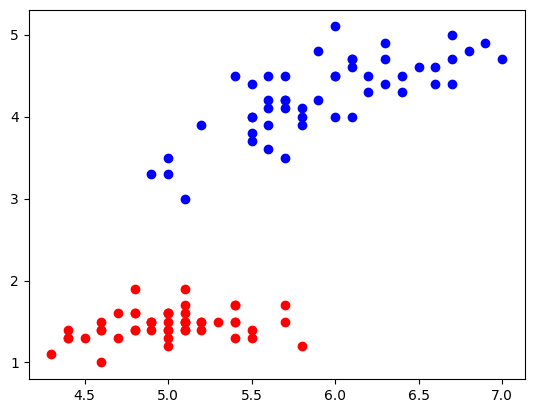

In [ ]:
import matplotlib.pyplot as plt 
plt.scatter(X[:50,0],X[0:50,1],color='red')
plt.scatter(X[50:,0],X[50:,1],color='blue')
plt.show()

traning 

In [ ]:
p1=perceptron(eta=.1,n_iter=10)

In [ ]:
p1.fit(X,Y)

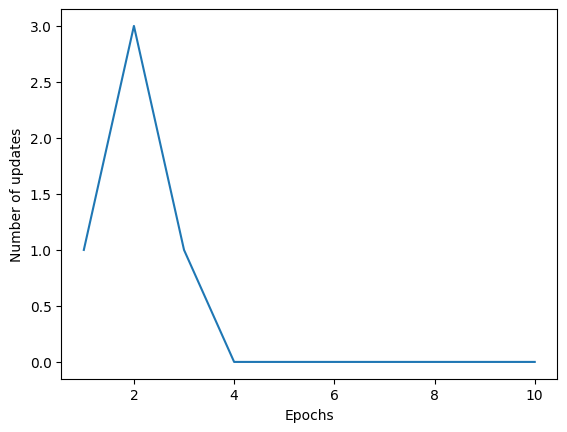

In [ ]:
plt.plot(range(1, len(p1.error)+1),p1.error)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [ ]:
class adaline_network(object):
  def __init__(self,eta=.01,n_iter=50,random_state=1):
    self.eta=eta
    self.n_iter=n_iter
    self.random_state=random_state

  def fit(self,X,Y):
    rgen=np.random.RandomState(self.random_state)
    self.wt=rgen.normal(loc=0.0,scale=.01,size=1+X.shape[1])
    self.cost_ = []
    for i in range(self.n_iter):
        net_input = self.input(X)
        output = self.activation(net_input)
        errors = (Y - output)
        self.wt[1:] += self.eta * X.T.dot(errors)
        self.wt[0] += self.eta * errors.sum()
        cost = (errors**2).sum() / 2.0
        self.cost_.append(cost)
    return self     
     


  def input(self,X):
    return(np.dot(X,self.wt[1:]+self.wt[0]))
  
  def activation(self,X):
    return X

  def predict(self,X):
    return(self.activation(self.input(X))>=0.0,1,-1)
    

In [ ]:
ada=adaline_network(n_iter=10,eta=.1).fit(X,Y)

In [ ]:
ada1=adaline_network(n_iter=10,eta=.0001).fit(X,Y)

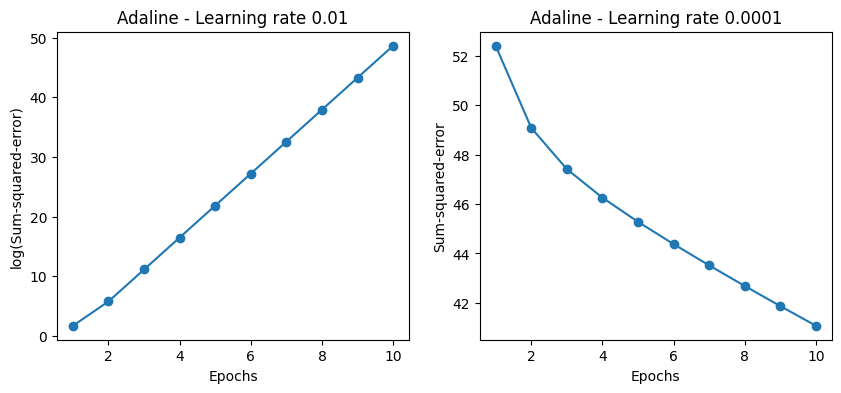

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax[0].plot(range(1, len(ada.cost_) + 1),np.log10(ada.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')
ax[1].plot(range(1, len(ada1.cost_) + 1),ada1.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

In [ ]:
ada1.cost_

[52.402635685630315,
 49.080784005161554,
 47.41183936756685,
 46.256330492643286,
 45.279870283653466,
 44.37856680873679,
 43.517311738469466,
 42.68288861918268,
 41.86969008017643,
 41.0750368424021]

standardizing data

In [ ]:
X_std=np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [ ]:
ada2=adaline_network(n_iter=15,eta=.0001).fit(X_std,Y)

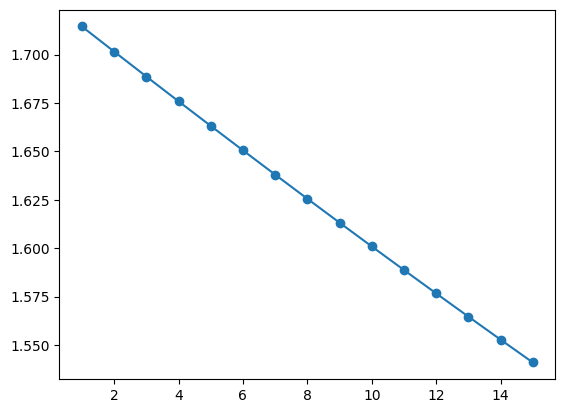

In [ ]:
plt.plot(range(1, len(ada2.cost_) + 1),np.log10(ada2.cost_), marker='o')
plt.show()

low learning rate

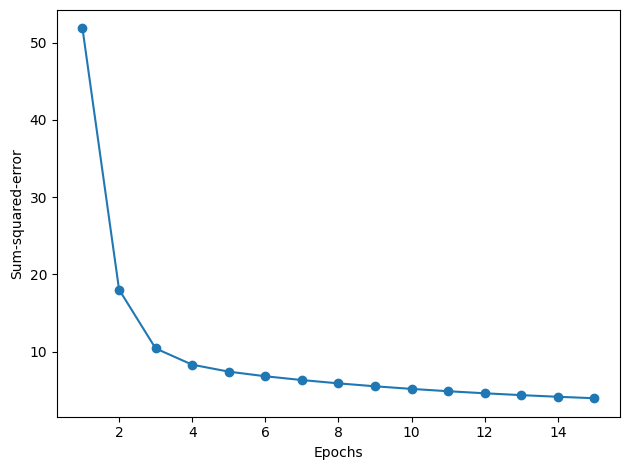

In [ ]:
ada_gd = adaline_network(n_iter=15, eta=0.003)
ada_gd.fit(X_std, Y)
plt.plot(range(1, len(ada_gd.cost_) + 1),ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()

better learning rate